In [2]:
from os import path
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import json

## 查看annotation檔案

Annotation以json格式儲存，我們讀出來單個annotation file來儲存所有subject的annotations。

In [3]:
# 讀取.json 檔
data_root = '/home/jovyan/ta-hsi-datacenter3/Medical/CMU_Course_sy/dataset/ludb'
annotation_path = path.join(data_root,'ludb_annotation.json')
with open(annotation_path, "r") as f:
    annotations = json.load(f)

看一下annotation的格式

In [4]:
print("Get type:",type(annotations))
print("Number of data:",len(annotations))
print("Type of annotation:",type(annotations[0]))

Get type: <class 'list'>
Number of data: 200
Type of annotation: <class 'dict'>


In [11]:
annotations[1]

{'csv': '2.csv',
 'label': [{'start': 550, 'end': 586, 'timeserieslabels': ['N']},
  {'start': 666, 'end': 749, 'timeserieslabels': ['t']},
  {'start': 916, 'end': 956, 'timeserieslabels': ['p']},
  {'start': 995, 'end': 1032, 'timeserieslabels': ['N']},
  {'start': 1108, 'end': 1198, 'timeserieslabels': ['t']},
  {'start': 1357, 'end': 1409, 'timeserieslabels': ['p']},
  {'start': 1439, 'end': 1486, 'timeserieslabels': ['N']},
  {'start': 1550, 'end': 1635, 'timeserieslabels': ['t']},
  {'start': 1809, 'end': 1849, 'timeserieslabels': ['p']},
  {'start': 1886, 'end': 1932, 'timeserieslabels': ['N']},
  {'start': 2000, 'end': 2091, 'timeserieslabels': ['t']},
  {'start': 2271, 'end': 2320, 'timeserieslabels': ['p']},
  {'start': 2353, 'end': 2389, 'timeserieslabels': ['N']},
  {'start': 2466, 'end': 2551, 'timeserieslabels': ['t']},
  {'start': 2728, 'end': 2772, 'timeserieslabels': ['p']},
  {'start': 2810, 'end': 2849, 'timeserieslabels': ['N']},
  {'start': 2930, 'end': 3003, 'times

In [6]:
# 觀察一些性質

# 觀察數量
type_count = {'p': 0, 'N': 0, 't': 0}
type_durations = {'p': [], 'N': [], 't': []}
n_labels_all = []
for annots in annotations:
    n_labels_all.append(len(annots['label']))
    
    for ann in annots['label']:
        y = ann['timeserieslabels'][0]
        duration = ann['end']-ann['start']
        type_count[y] += 1
        type_durations[y].append(duration)


<BarContainer object of 3 artists>

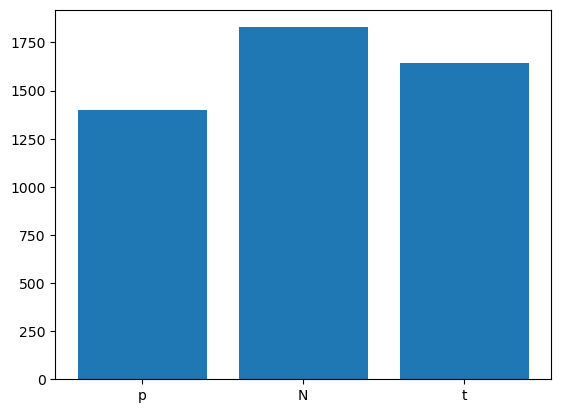

In [7]:
# view count of types
plt.bar(type_count.keys(), type_count.values())

可以看到三種label出現次數差不多

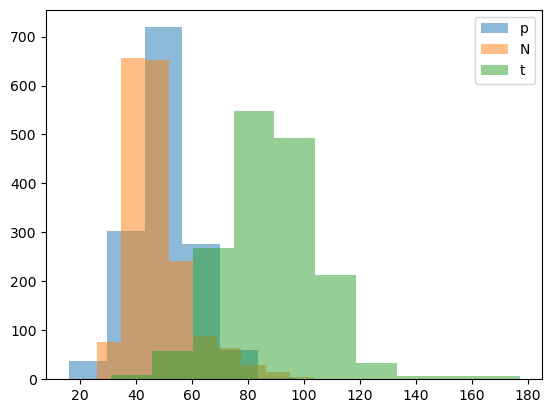

In [8]:
# plot distribution of durations
for k, v in type_durations.items():
    plt.hist(v, alpha=0.5, label=k)
plt.legend()

可以看到t的延續時間平均來講較長但變化也較大，可能是因為有包含各種疾病的病患資料。

對Segmentation訓練而言，duration長度越長的class等同資料越多，可能會造成不平衡的訓練偏好

可以使用一些weighted sampling方式或者一些特殊的loss進行處理 e.g. Focal Loss

In [9]:
# Calculate weight for each class, no need to sum upt to 1
type_weights = {k: 1/np.array(v).mean() for k, v in type_durations.items()}
type_weights = {k: v/sum(type_weights.values()) for k, v in type_weights.items()} # Noemalize the sum of weights to 1 for better understanding

<BarContainer object of 3 artists>

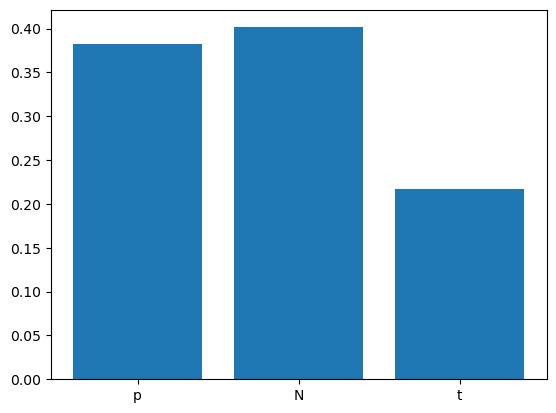

In [10]:
# view weight of class
plt.bar(type_weights.keys(), type_weights.values())